In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

# Time Series Classification and Clustering Assignment

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

<IPython.core.display.Javascript object>

### Import the Walmart stock price data set (WMT_data.csv).

In [3]:
df = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%205/WMT_data.csv"
)

<IPython.core.display.Javascript object>

In [4]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,71.20,71.64,71.070,71.48,5906823,WMT
1,2013-02-11,71.25,71.51,70.530,71.40,6202534,WMT
2,2013-02-12,71.49,71.66,71.100,71.40,4761910,WMT
3,2013-02-13,71.29,71.70,71.210,71.39,3969807,WMT
4,2013-02-14,71.10,71.23,70.755,70.82,6820952,WMT


<IPython.core.display.Javascript object>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date'>

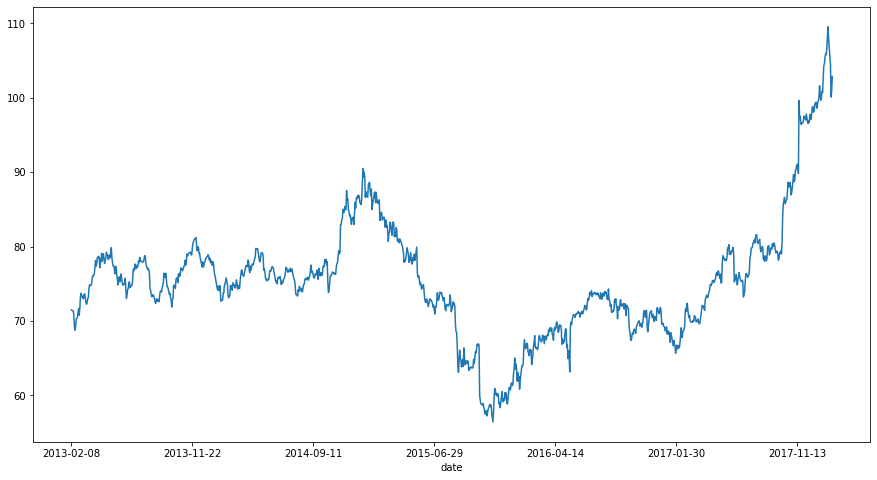

<IPython.core.display.Javascript object>

In [6]:
df.set_index("date")["close"].plot(kind="line", figsize=(15, 8))

### Transform the data to be able to predict minor direction changes in the stock's price, given 180 days of history.

- Remember to calculate daily returns from the observed values (closing price).
- Make the critera for identifying a direction change when the observed values (closing price) cross the 5 day moving average.
- Create a binary column that defaults to 0 unless the criteria is met (then updates to 1).
- Shift the data set so that you have 180 days of history for each record.

In [7]:
df["returns"] = df.close.pct_change()
df["ma_5_day"] = df.close.rolling(5).mean()
df.head()

,date,open,high,low,close,volume,Name,returns,ma_5_day
0,2013-02-08,71.20,71.64,71.070,71.48,5906823,WMT,NaN,NaN
1,2013-02-11,71.25,71.51,70.530,71.40,6202534,WMT,-0.001119,NaN
2,2013-02-12,71.49,71.66,71.100,71.40,4761910,WMT,0.000000,NaN
3,2013-02-13,71.29,71.70,71.210,71.39,3969807,WMT,-0.000140,NaN
4,2013-02-14,71.10,71.23,70.755,70.82,6820952,WMT,-0.007984,71.298


<IPython.core.display.Javascript object>

In [8]:
df["trend"] = "none"
df.loc[(df.ma_5_day < df.close), "trend"] = "negative"
df.loc[(df.ma_5_day > df.close), "trend"] = "positive"
df.head()

,date,open,high,low,close,volume,Name,returns,ma_5_day,trend
0,2013-02-08,71.20,71.64,71.070,71.48,5906823,WMT,NaN,NaN,none
1,2013-02-11,71.25,71.51,70.530,71.40,6202534,WMT,-0.001119,NaN,none
2,2013-02-12,71.49,71.66,71.100,71.40,4761910,WMT,0.000000,NaN,none
3,2013-02-13,71.29,71.70,71.210,71.39,3969807,WMT,-0.000140,NaN,none
4,2013-02-14,71.10,71.23,70.755,70.82,6820952,WMT,-0.007984,71.298,positive


<IPython.core.display.Javascript object>

In [9]:
df["binary"] = ((df.trend != "none") & ~df.trend.eq(df.trend.shift())) * 1

<IPython.core.display.Javascript object>

In [12]:
df.dropna(inplace=True)
df.head(20)

,date,open,high,low,close,volume,Name,returns,ma_5_day,trend,binary
4,2013-02-14,71.1000,71.230,70.7550,70.82,6820952,WMT,-0.007984,71.298,positive,1
5,2013-02-15,69.5400,70.000,68.1300,69.30,25687156,WMT,-0.021463,70.862,positive,0
6,2013-02-19,69.1900,69.450,68.5400,68.76,14683322,WMT,-0.007792,70.334,positive,0
7,2013-02-20,68.7200,69.850,68.3000,69.21,11973720,WMT,0.006545,69.896,positive,0
8,2013-02-21,70.0000,71.470,69.7200,70.26,20425983,WMT,0.015171,69.670,negative,1
9,2013-02-22,70.2200,70.540,69.8900,70.40,9169060,WMT,0.001993,69.586,negative,0
10,2013-02-25,70.5000,71.340,70.4400,70.44,11819590,WMT,0.000568,69.814,negative,0
11,2013-02-26,70.6900,71.390,70.6100,71.11,10558487,WMT,0.009512,70.284,negative,0
12,2013-02-27,70.9200,71.955,70.5800,71.66,8820257,WMT,0.007734,70.774,negative,0
13,2013-02-28,71.5900,71.880,70.7800,70.78,18874853,WMT,-0.012280,70.878,positive,1


<IPython.core.display.Javascript object>

In [18]:
transformed = df[["date", "returns", "binary"]].copy()

history = 180
future = 0

shifts = [x + future for x in range(1, history + 1)]

for shift in shifts:
    transformed[f"t-{shift}"] = transformed.returns.shift(shift)

transformed.dropna(inplace=True)
transformed.head(20)

,date,returns,binary,t-1,t-2,t-3,t-4,t-5,t-6,t-7,...,t-171,t-172,t-173,t-174,t-175,t-176,t-177,t-178,t-179,t-180
184,2013-10-31,-0.002080,1,-0.001947,-0.001037,0.013933,-0.004449,0.006851,-0.005503,0.015569,...,-0.012280,0.007734,0.009512,0.000568,0.001993,0.015171,0.006545,-0.007792,-0.021463,-0.007984
185,2013-11-01,0.004169,1,-0.002080,-0.001947,-0.001037,0.013933,-0.004449,0.006851,-0.005503,...,0.013563,-0.012280,0.007734,0.009512,0.000568,0.001993,0.015171,0.006545,-0.007792,-0.021463
186,2013-11-04,0.003374,0,0.004169,-0.002080,-0.001947,-0.001037,0.013933,-0.004449,0.006851,...,0.021188,0.013563,-0.012280,0.007734,0.009512,0.000568,0.001993,0.015171,0.006545,-0.007792
187,2013-11-05,0.001164,0,0.003374,0.004169,-0.002080,-0.001947,-0.001037,0.013933,-0.004449,...,0.006279,0.021188,0.013563,-0.012280,0.007734,0.009512,0.000568,0.001993,0.015171,0.006545
188,2013-11-06,0.009558,0,0.001164,0.003374,0.004169,-0.002080,-0.001947,-0.001037,0.013933,...,-0.004612,0.006279,0.021188,0.013563,-0.012280,0.007734,0.009512,0.000568,0.001993,0.015171
189,2013-11-07,-0.008316,0,0.009558,0.001164,0.003374,0.004169,-0.002080,-0.001947,-0.001037,...,-0.000818,-0.004612,0.006279,0.021188,0.013563,-0.012280,0.007734,0.009512,0.000568,0.001993
190,2013-11-08,0.005806,0,-0.008316,0.009558,0.001164,0.003374,0.004169,-0.002080,-0.001947,...,-0.003955,-0.000818,-0.004612,0.006279,0.021188,0.013563,-0.012280,0.007734,0.009512,0.000568
191,2013-11-11,0.013468,0,0.005806,-0.008316,0.009558,0.001164,0.003374,0.004169,-0.002080,...,-0.000685,-0.003955,-0.000818,-0.004612,0.006279,0.021188,0.013563,-0.012280,0.007734,0.009512
192,2013-11-12,-0.003797,0,0.013468,0.005806,-0.008316,0.009558,0.001164,0.003374,0.004169,...,0.008495,-0.000685,-0.003955,-0.000818,-0.004612,0.006279,0.021188,0.013563,-0.012280,0.007734
193,2013-11-13,0.002414,0,-0.003797,0.013468,0.005806,-0.008316,0.009558,0.001164,0.003374,...,0.000679,0.008495,-0.000685,-0.003955,-0.000818,-0.004612,0.006279,0.021188,0.013563,-0.012280


<IPython.core.display.Javascript object>

### Train a Logistic Regression classification model on the transformed data.

In [19]:
X = transformed.drop(columns=["date", "returns", "binary"])
y = transformed.binary

<IPython.core.display.Javascript object>

In [25]:
y.value_counts()

0    787
1    288
Name: binary, dtype: int64

<IPython.core.display.Javascript object>

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

logit = LogisticRegression(class_weight="balanced")
logit.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

<IPython.core.display.Javascript object>

### Run a classification report and evaluate the performance of the classifier.

In [27]:
y_test_pred = logit.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.63      0.70       161
           1       0.30      0.46      0.36        54

    accuracy                           0.59       215
   macro avg       0.54      0.55      0.53       215
weighted avg       0.66      0.59      0.61       215



<IPython.core.display.Javascript object>

### Transform the data again to have 10 days of history for clustering.

In [28]:
transformed = df[["date", "returns", "binary"]].copy()

history = 10
future = 0

shifts = [x + future for x in range(1, history + 1)]

for shift in shifts:
    transformed[f"t-{shift}"] = transformed.returns.shift(shift)

transformed.dropna(inplace=True)
transformed.head(20)

,date,returns,binary,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10
14,2013-03-01,0.013563,1,-0.012280,0.007734,0.009512,0.000568,0.001993,0.015171,0.006545,-0.007792,-0.021463,-0.007984
15,2013-03-04,0.021188,0,0.013563,-0.012280,0.007734,0.009512,0.000568,0.001993,0.015171,0.006545,-0.007792,-0.021463
16,2013-03-05,0.006279,0,0.021188,0.013563,-0.012280,0.007734,0.009512,0.000568,0.001993,0.015171,0.006545,-0.007792
17,2013-03-06,-0.004612,0,0.006279,0.021188,0.013563,-0.012280,0.007734,0.009512,0.000568,0.001993,0.015171,0.006545
18,2013-03-07,-0.000818,0,-0.004612,0.006279,0.021188,0.013563,-0.012280,0.007734,0.009512,0.000568,0.001993,0.015171
19,2013-03-08,-0.003955,1,-0.000818,-0.004612,0.006279,0.021188,0.013563,-0.012280,0.007734,0.009512,0.000568,0.001993
20,2013-03-11,-0.000685,0,-0.003955,-0.000818,-0.004612,0.006279,0.021188,0.013563,-0.012280,0.007734,0.009512,0.000568
21,2013-03-12,0.008495,1,-0.000685,-0.003955,-0.000818,-0.004612,0.006279,0.021188,0.013563,-0.012280,0.007734,0.009512
22,2013-03-13,0.000679,0,0.008495,-0.000685,-0.003955,-0.000818,-0.004612,0.006279,0.021188,0.013563,-0.012280,0.007734
23,2013-03-14,-0.005838,1,0.000679,0.008495,-0.000685,-0.003955,-0.000818,-0.004612,0.006279,0.021188,0.013563,-0.012280


<IPython.core.display.Javascript object>

### Train a K Means clustering model on the data. 

Try different values for K and see how the summary changes.

In [46]:
X = transformed.drop(columns=["date", "returns", "binary"])

kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(X)
results = X.copy()
results["cluster"] = clusters

print(results.cluster.value_counts())

summary = results.groupby("cluster", as_index=False).mean()
summary

2    262
1    257
4    249
3    240
0    237
Name: cluster, dtype: int64


,cluster,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10
0,0,-0.003116,0.000157,0.001891,0.001883,0.008736,-0.002118,-0.007126,0.000606,0.007139,0.000010
1,1,-0.000814,0.001111,0.001827,0.004394,-0.006760,-0.006274,0.001601,0.007850,-0.000737,-0.003277
2,2,0.006876,-0.002850,-0.007870,0.002727,0.002966,0.001754,0.001486,-0.001582,-0.004623,-0.001689
3,3,-0.003090,-0.003814,0.005469,0.001814,-0.001012,0.001503,0.006963,-0.005533,0.000767,0.007681
4,4,0.001220,0.007048,0.001201,-0.009028,-0.001516,0.007267,-0.000982,0.000408,0.000026,-0.000381


<IPython.core.display.Javascript object>

### Visualize the summary of the clustering results as a heatmap.

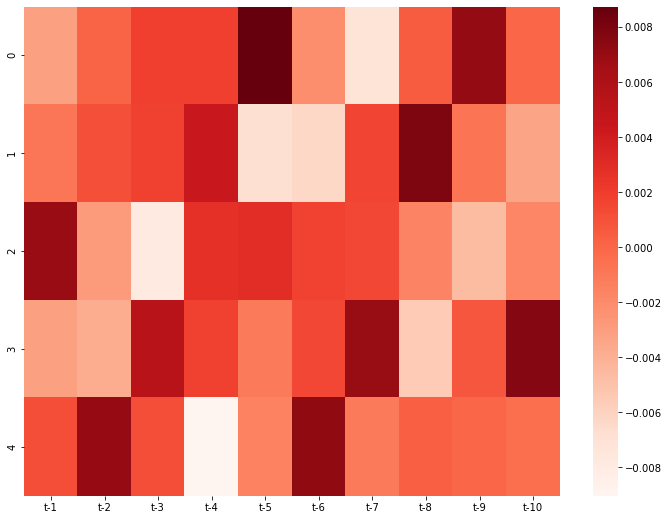

<IPython.core.display.Javascript object>

In [53]:
plt.figure(figsize=(12, 9))
sns.heatmap(summary.drop("cluster", axis=1), cmap="Reds")
plt.show()